# Analysis Notebook

In [190]:
import numpy as np
import pandas as pd

from scipy import signal
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

from load_data import load_data, fs, ch_names

In [191]:
window_names = [
    e.strip()
    for e in """
boxcar

triang

blackman

hamming

hann

bartlett

flattop

parzen

bohman

blackmanharris

nuttall

barthann

cosine

exponential

tukey

taylor

lanczos
""".split(
        "\n"
    )
    if e.strip()
]


In [192]:
data_path = Path('data/4hz/S0.mat')
data = load_data(data_path)
print(f'data shape: {data.shape}')

2024-03-05 10:35:00.363 | INFO     | load_data:load_data:105 - Got data data\4hz\S0.mat: (28, 60, 1601) | <class 'numpy.ndarray'>


data shape: (28, 60, 1601)


In [193]:
window = 'hamming'
freq, Pxx_den = signal.welch(data, fs, window=window)
freq.shape, Pxx_den.shape

((129,), (28, 60, 129))

In [194]:
normalizer = np.mean(Pxx_den, axis=0)
print(f'normalizer shape: {normalizer.shape}')

den1 = Pxx_den[:14]
den2 = Pxx_den[14:]

den1_n = den1 / normalizer
den2_n = den2 / normalizer

normalizer shape: (60, 129)


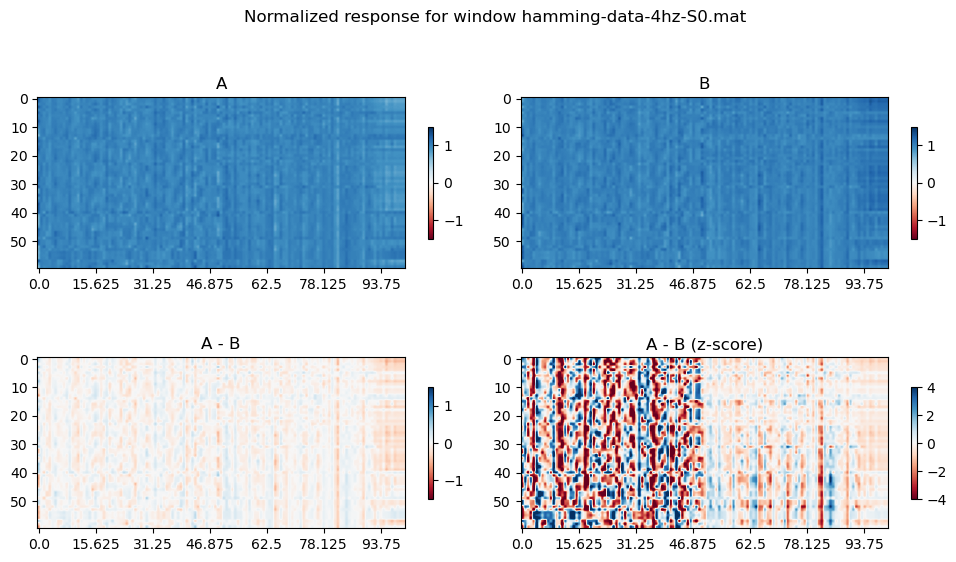

In [195]:
imshow_kwargs = dict(
    vmin=-1.5,
    vmax=1.5,
    cmap='RdBu',
)

color_kwargs = dict(shrink=0.4)

freq_step=20

# --------------------
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
ax = axs[0, 0]
d = np.mean(den1_n, axis=0)

im = ax.imshow(d, **imshow_kwargs)
ax.set_xticks(np.arange(len(freq), step=freq_step), labels=freq[::freq_step])
ax.set_title('A')
plt.colorbar(im, **color_kwargs)

# --------------------
ax = axs[0, 1]
d = np.mean(den2_n, axis=0)

im = ax.imshow(d, **imshow_kwargs)
ax.set_xticks(np.arange(len(freq), step=freq_step), labels=freq[::freq_step])
ax.set_title('B')
plt.colorbar(im, **color_kwargs)

# --------------------
ax = axs[1, 0]
d = np.mean(den1_n, axis=0) - np.mean(den2_n, axis=0)

im = ax.imshow(d, **imshow_kwargs)
ax.set_xticks(np.arange(len(freq), step=freq_step), labels=freq[::freq_step])
ax.set_title('A - B')
plt.colorbar(im, **color_kwargs)

# --------------------
_kwargs = imshow_kwargs.copy()
_kwargs.update(dict(vmin=-4, vmax=4))
ax = axs[1, 1]
d = (np.mean(den1_n, axis=0) - np.mean(den2_n, axis=0)) / (np.std(den1_n, axis=0) + np.std(den2_n, axis=0)) * 2

im = ax.imshow(d, **_kwargs)
ax.set_xticks(np.arange(len(freq), step=freq_step), labels=freq[::freq_step])
ax.set_title('A - B (z-score)')
plt.colorbar(im, **color_kwargs)

dp = data_path.as_posix().replace("/", "-")
sp = f'Normalized response for window {window}-{dp}'
plt.suptitle(sp)
plt.tight_layout()

# --------------------
plt.show()
fig_name = sp.replace(' ', '-') + '.jpg'
fig.savefig(f'{sp}.jpg')